# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [2]:
import pandas as pd
import numpy as np


### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [3]:
df_pew_research =  pd.read_csv('./CSVs/pew-raw.csv')

FileNotFoundError: [Errno 2] No such file or directory: './CSVs/pew-raw.csv'

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [ ]:
df_pew_research.head(5)

***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [ ]:
# id_vars is the identifier variables (columns that won't change)
# var_name is the name where columns will be grouped in
# value_name is the value inside the cell which will be represented in a column
df_pew_tidy= pd.melt(df_pew_research,id_vars=["religion"],var_name="income_range", value_name="citizens count")

In [ ]:
### Replace <10k with $0-10k
df_pew_tidy.replace(' <$10k', '$0-10k', inplace=True)
## Remove $ and k
df_pew_tidy['income_range'] = df_pew_tidy['income_range'].str.replace(' ', '')
df_pew_tidy['income_range'] = df_pew_tidy['income_range'].str.replace('$', '')
df_pew_tidy['income_range'] = df_pew_tidy['income_range'].str.replace('k', '')
df_pew_tidy
## Another solution with REGEX?

In [ ]:
df_pew_tidy['minimum_income']=np.array(df_pew_tidy['income_range'].str.split('-').to_list())[:,0].astype(int)
df_pew_tidy['maximum_income']=np.array(df_pew_tidy['income_range'].str.split('-').to_list())[:,1].astype(int)
df_pew_tidy

### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [ ]:
df_billboard = pd.read_csv('./CSVs/billboard.csv',encoding="unicode_escape")
df_billboard

2. Observe the first few rows of the dataset.

In [ ]:
df_billboard.head(10)

***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [ ]:
#Which columns do I want to keep, as they are? 
id_vars=['year',	'artist.inverted',	'track',	'time',	'genre',	'date.entered',	'date.peaked']
df_billboard = pd.melt(df_billboard,id_vars=id_vars,var_name='Week', value_name='Rank')

In [ ]:
df_billboard

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [ ]:
df_billboard['Week'] = df_billboard['Week'].str.extract('(\d+)',expand=False) #expand determines whether a series or a dataframe is returned 

5. Now let's inspect the ***Week*** column in the dataframe.

In [ ]:
df_billboard

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [ ]:
df_billboard.info()

In [ ]:
#date_at_current_peak = date.entered + week (in days, to increment the date by that number of days)

# Let's make sure that the Week column is numeric.
df_billboard['Week'] = df_billboard['Week'].astype(int)
df_billboard['Rank Date'] = pd.to_datetime(df_billboard['date.entered'] )+ pd.to_timedelta(df_billboard['Week'], unit='W') 
df_billboard.head()

*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

In [4]:
df_billboard['Rank Date'] = pd.to_datetime(df_billboard['date.entered'] )+ pd.to_timedelta(df_billboard['Week'], unit='W') - pd.DateOffset(weeks=1)

NameError: name 'df_billboard' is not defined

In [ ]:
df_billboard.head()

7. Let's only keep necessary columns

In [ ]:
df_billboard = df_billboard[['year','artist.inverted','track','time','genre','Rank','Rank Date']]

In [ ]:
df_billboard.head()

8. How to rename your columns?

In [5]:
df_billboard = df_billboard.rename(columns={'year':'Year','artist.inverted':'Artist LN-FN','track':'Track','time':'Time','genre':'Genre'})

NameError: name 'df_billboard' is not defined

Display the dataframe

In [ ]:
df_billboard

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [6]:
df_billboard = df_billboard.dropna()

NameError: name 'df_billboard' is not defined

In [ ]:
df_billboard

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [7]:
import pandas as pd
df_cars= pd.read_csv('./CSVs/cars.csv', sep=";")
df_cars.head()

FileNotFoundError: [Errno 2] No such file or directory: './CSVs/cars.csv'

In [ ]:
## First Row seems to be the datatype, we need to remove it
df_cars = df_cars.iloc[1:]
df_cars

Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [ ]:
# get the number of missing data points per column
missing_values_count_cars = df_cars.isnull().sum()
#look at the missing value
print(missing_values_count_cars)

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [ ]:
# How many total missing values do we have?
# shape returns the dimentionality of a dataframe (rows and columns), can you guess what product will do?
total_cells_cars = np.product(df_cars.shape) 
total_missing_cars = missing_values_count_cars.sum()

# percent of data that is missing
percentage_missign_values_cars = (total_missing_cars/total_cells_cars) * 100
print(percentage_missign_values_cars)

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [ ]:
df_cars_cleaned = df_cars.dropna() #this will drop the rows with null values
df_cars_cleaned.head()

In [ ]:
df_cars_cleaned_null_cols = df_cars.dropna(axis=1) #this will drop the columns with null values
df_cars_cleaned_null_cols.head()

Let's observe how many columns we lost

In [ ]:
print("Columns in original dataset: %d \n" % df_cars.shape[1])
print("Columns with na's dropped: %d" % df_cars_cleaned_null_cols.shape[1])

### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [8]:
df_cars_temp = df_cars.fillna(0)

NameError: name 'df_cars' is not defined

In [ ]:
df_cars_temp.head()

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
current_MPG = df_cars_cleaned['MPG']
current_MPG = current_MPG.astype(float)

In [ ]:
mpg_list = current_MPG.sort_values(ascending=True).values.tolist()

In [ ]:
bins = [0,5,10,15,20,25,30,35,40,45,50]
# kde --> kernel density estimation (line)
ax = sns.displot(x=mpg_list,bins=bins,kde=True)
ax.set(xlabel="MPG",ylabel="Count")

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [9]:
#convert the following column to float
df_cars_cleaned['MPG'] = df_cars_cleaned['MPG'].astype(float)

NameError: name 'df_cars_cleaned' is not defined

Now let's see what is the mean of the MPG column

In [ ]:
np.mean (df_cars_cleaned['MPG'])

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [10]:
df_cars['MPG'].fillna((df_cars_cleaned['MPG'].mean()), inplace=True) #inplace doesnt require me to aassign result to a new df

NameError: name 'df_cars' is not defined

In [ ]:
df_cars.head()

### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [11]:
from sklearn.impute import SimpleImputer 

In [12]:
# strategy --> mean, median, most_frequent, constant (you need to set fill_value)
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='median') 

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [13]:
imputer = imputer.fit(df_cars.iloc[:,1:8]) 

NameError: name 'df_cars' is not defined

In [ ]:
df_cars.iloc[:,1:8] = imputer.transform(df_cars.iloc[:,1:8])

In [ ]:
df_cars.head()

## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [14]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
 
# Load the dataset
diabetics = load_diabetes()
 
# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

<Axes: ylabel='bmi'>

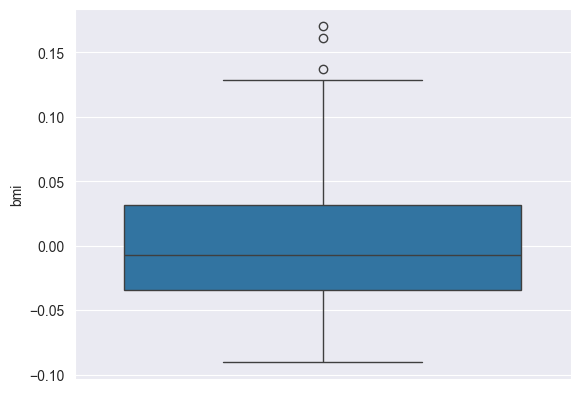

In [15]:
# Box Plot
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])

In [16]:
pd.unique(df_diabetics.sex)

array([ 0.05068012, -0.04464164])

In [17]:
def sex_values(sex):
    if sex>0:
        return 'Male'
    else:
        return 'Female'

In [18]:
df_diabetics['sex_categorical'] = df_diabetics['sex'].apply(sex_values)

In [19]:
df_diabetics.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,sex_categorical
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,Male
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,Female
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,Male
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,Female
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,Female


#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

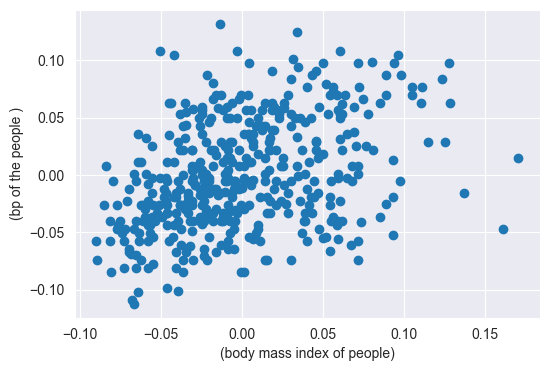

In [20]:
# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df_diabetics['bmi'],df_diabetics['bp'])
 
# x-axis label
ax.set_xlabel('(body mass index of people)')
 
# y-axis label
ax.set_ylabel('(bp of the people )')
plt.show()

In [21]:
## Getting positions of outliers
import numpy as np
print(np.where((df_diabetics['bmi']>0.12) & (df_diabetics['bp']<0.8)))


(array([ 32, 145, 256, 262, 366, 367, 405]),)


#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [22]:
# Z score
from scipy import stats
 
z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [23]:
threshold = 2
 
# Position of the outlier
print(np.where(z > 2))

(array([ 10,  26,  41,  77,  79, 106, 131, 204, 223, 226, 242, 311, 321,
       344, 374, 402]),)


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [24]:
# IQR
Q1 = np.percentile(df_diabetics['bmi'], 25)
Q3 = np.percentile(df_diabetics['bmi'], 75)
IQR = Q3 - Q1
print(IQR)

0.06547708348825859


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [26]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df_diabetics['bmi']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df_diabetics['bmi']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: 0.1294636406639386
3
Lower Bound: -0.13244469328909578
0


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

dataframe.drop(row index,inplace=True)



In [ ]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetics['bmi']>=upper)[0]
lower_array = np.where(df_diabetics['bmi']<=lower)[0]
print("Old Shape: ", df_diabetics.shape)
# Removing the outliers
df_diabetics_copy = df_diabetics.copy()
df_diabetics_copy.drop(index=upper_array, inplace=True)
df_diabetics_copy.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df_diabetics_copy.shape)